# An Evaluation of the SGID Process on Student Performance and Participation in Human Anatomy 

### By Jonathan Okerblom, 11/14/2023

## Background:
Small Group Instructional Diagnosis (SGID) is a formative feedback process widely recognized in higher education for enhancing teaching and learning experiences. It originated in the 1970s as a collaborative initiative to bridge the gap between instructors' teaching methods and students' learning needs. SGID stands out from traditional evaluation methods due to its focus on constructive, in-the-moment feedback, rather than end-of-term evaluations.

#### Origins and Original Intent
Developed by Joseph Clark and Malcolm Redmond, SGID was designed as a participatory and reflective tool, intended to foster a deeper understanding of the learning environment from both the instructor's and students' perspectives. A key aspect of SGID is encouraging student introspection, not just about the course content and teaching methods, but also about their own learning behaviors and needs. This dual focus aims to create a more holistic approach to educational improvement.

####  Over Time
Over the years, SGID has evolved in its application and methodology. While the core principles of open communication, mutual assessment, and collaborative improvement remain intact, the specific practices of SGID have been adapted to fit diverse educational settings and institutional cultures. Of note, there is a differences in whether or not the student introspection component is included, whether or not students vote to reach consensus, and whether or not students are required to come up with items for each topic. 

#### Implementation at Our College
At our college, SGID is implemented through a structured process involving facilitator-led small group discussions. Students in each group are required to provide positive aspects of the class, areas for improvement, and suggestions for change. This approach aligns with the SGID's foundational principles, yet it also reflects our institution's unique educational ethos and objectives.

#### Purpose of the Report
This report aims to critically examine our current SGID implementation on my Human Anatomy course, assess its effectiveness in light of the original intents of SGID, and propose enhancements to ensure it continues to serve as a meaningful tool for educational improvement.

## Methods and Results:
### Analysis of Lab Performance Over Time: Visualization
Student lab exam scores over the past 3 semesters were visualized using pandas and matplotlib. To help with visualization, when the SGID occured (in Fall Semesters) was also indicated and a legend that differentiates between Spring and Fall Semesters was also included. The following code was applied for this visualization:

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean, stdev
from scipy import stats
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

In [18]:
#Optional for disabling warnings 

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [19]:
#Set figure resolution to 300dpi
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [20]:
#Import the excel file containing exam scores and describe it

df = pd.read_csv (r'./semester1_anatomylab.csv', index_col=0) 

In [21]:
df.fillna(df.mean(), inplace=True)

In [22]:
# Calculate percentage scores
for col in ['Labexam1', 'labexam2', 'labexam3', 'labexam4', 'labexam5', 'labexam6']:
    df[col] = df[col]/7 * 100

# Calculate mean and SEM for each lab exam
means = {}
sems = {}
for col in ['Labexam1', 'labexam2', 'labexam3', 'labexam4', 'labexam5', 'labexam6']:
    means[col + 'mean'] = np.mean(df[col])
    sems[col + 'sem'] = sem(df[col])

In [23]:
#Import the excel file containing exam scores and describe it

df2 = pd.read_csv (r'./semester2_anatomylab.csv', index_col=0) 

In [24]:
df2.fillna(df2.mean(), inplace=True)

In [25]:
# Calculate percentage scores
for col in ['Labexam1', 'labexam2', 'labexam3', 'labexam4', 'labexam5', 'labexam6']:
    df2[col] = df2[col]/7 * 100

# Calculate mean and SEM for each lab exam
means2 = {}
sems2 = {}
for col in ['Labexam1', 'labexam2', 'labexam3', 'labexam4', 'labexam5', 'labexam6']:
    means2[col + 'mean'] = np.mean(df2[col])
    sems2[col + 'sem'] = sem(df2[col])

In [26]:
#Import the excel file containing exam scores and describe it
df3 = pd.read_csv (r'./semester3_anatomylab.csv', index_col=0) 

In [27]:
df3.fillna(df3.mean(), inplace=True)

In [28]:
# Calculate percentage scores
for col in ['Labexam1', 'labexam2', 'labexam3', 'labexam4', 'labexam5']:
    df3[col] = df3[col]/7 * 100

# Calculate mean and SEM for each lab exam
means3 = {}
sems3 = {}
for col in ['Labexam1', 'labexam2', 'labexam3', 'labexam4', 'labexam5']:
    means3[col + 'mean'] = np.mean(df3[col])
    sems3[col + 'sem'] = sem(df3[col])

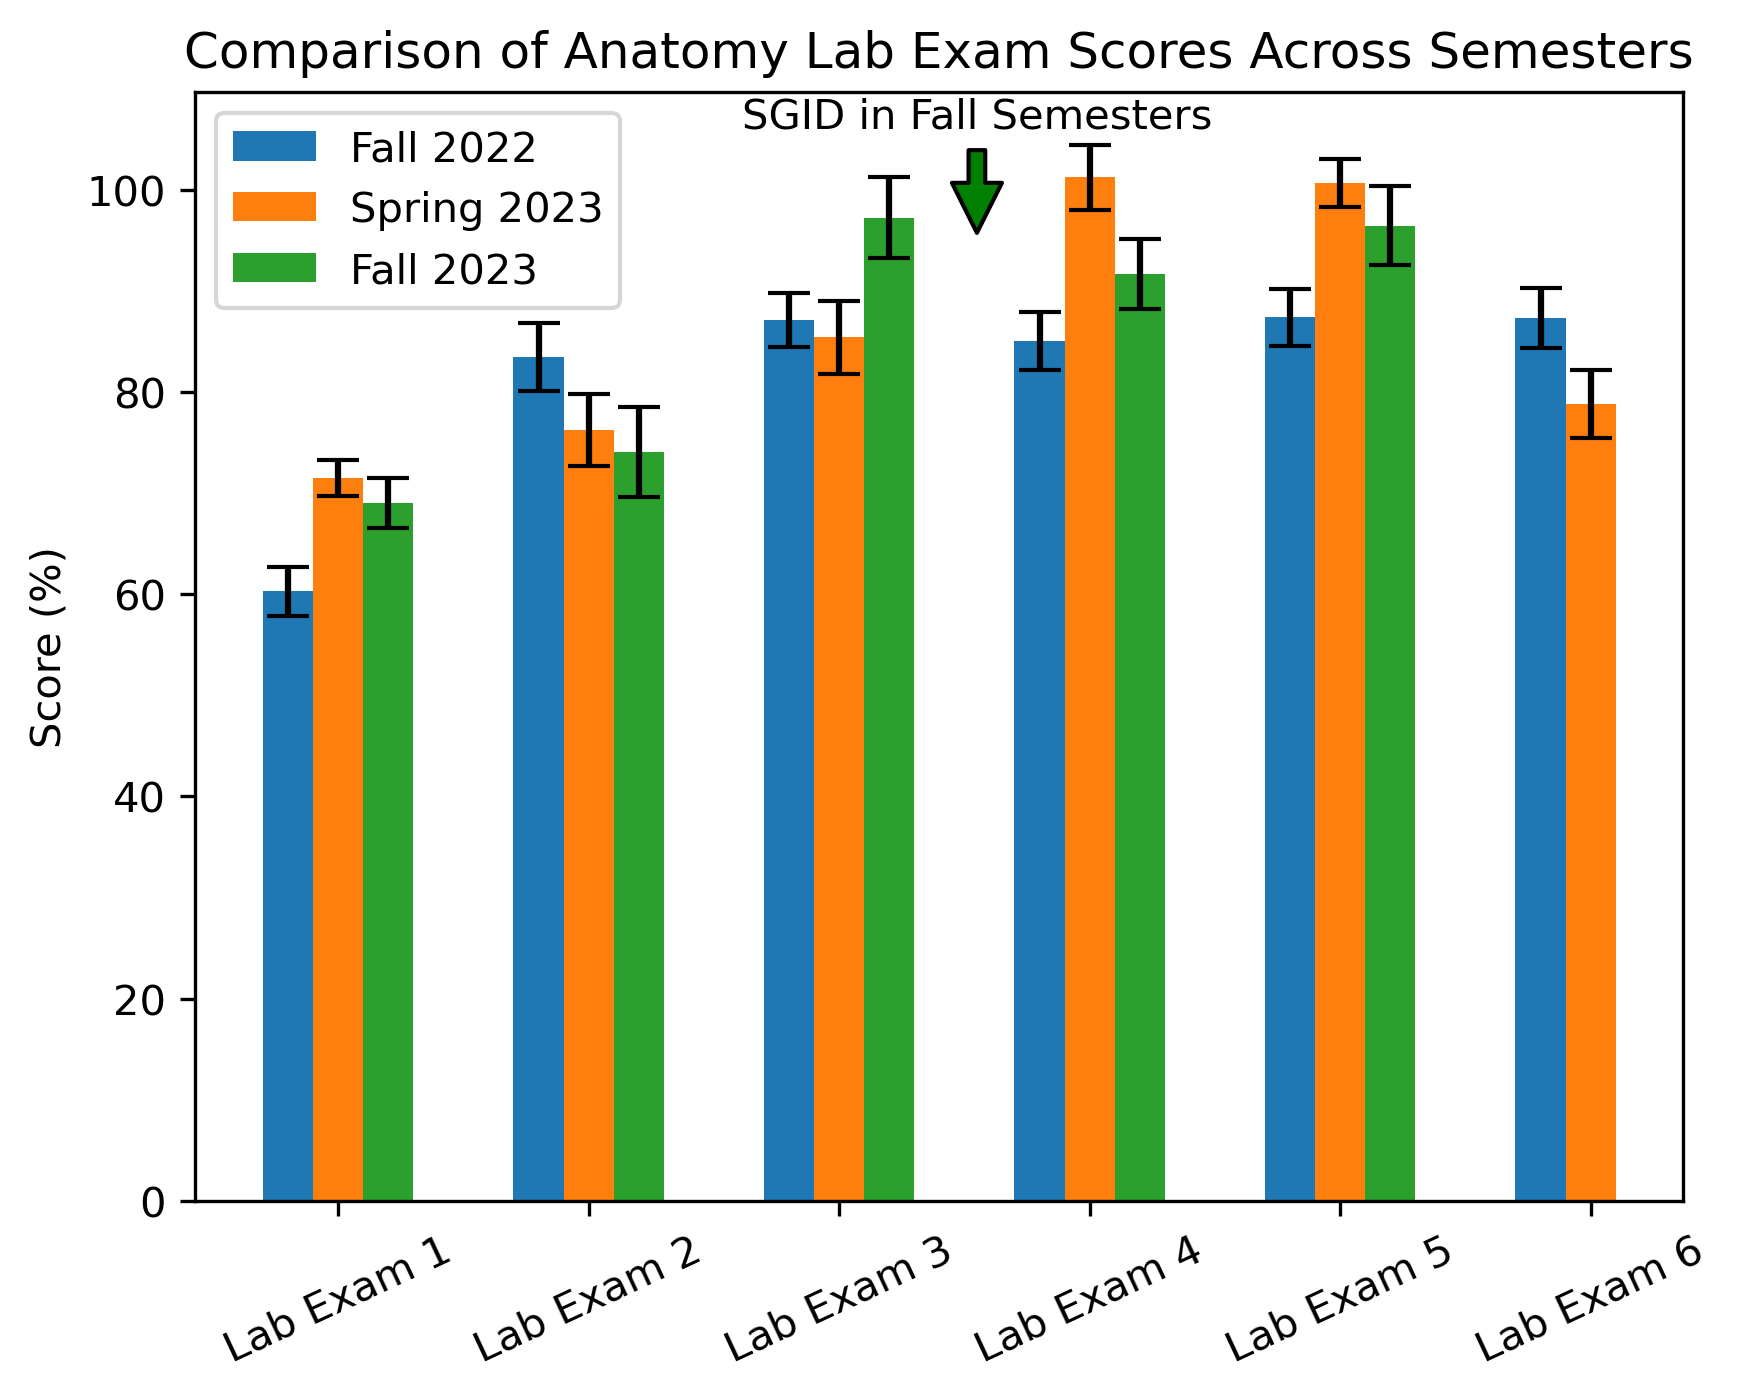

In [29]:
# Assuming 'means', 'sems', 'means2', 'sems2', 'means3', and 'sems3' are your dictionaries
exam_labels = ['Lab Exam 1', 'Lab Exam 2', 'Lab Exam 3', 'Lab Exam 4', 'Lab Exam 5', 'Lab Exam 6']
exam_labels3 = ['Lab Exam 1', 'Lab Exam 2', 'Lab Exam 3', 'Lab Exam 4', 'Lab Exam 5']

mean_values = [means['Labexam1mean'], means['labexam2mean'], means['labexam3mean'], means['labexam4mean'], means['labexam5mean'], means['labexam6mean']]
sem_values = [sems['Labexam1sem'], sems['labexam2sem'], sems['labexam3sem'], sems['labexam4sem'], sems['labexam5sem'], sems['labexam6sem']]

mean_values2 = [means2['Labexam1mean'], means2['labexam2mean'], means2['labexam3mean'], means2['labexam4mean'], means2['labexam5mean'], means2['labexam6mean']]
sem_values2 = [sems2['Labexam1sem'], sems2['labexam2sem'], sems2['labexam3sem'], sems2['labexam4sem'], sems2['labexam5sem'], sems2['labexam6sem']]

mean_values3 = [means3['Labexam1mean'], means3['labexam2mean'], means3['labexam3mean'], means3['labexam4mean'], means3['labexam5mean']]
sem_values3 = [sems3['Labexam1sem'], sems3['labexam2sem'], sems3['labexam3sem'], sems3['labexam4sem'], sems3['labexam5sem']]

# Set the width of the bars
bar_width = 0.2  # Adjusted for three datasets

# Set the positions of the bars on the x-axis
r1 = np.arange(len(mean_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1][:len(mean_values3)]  # Adjust for df3's length

# Build the bar plots
plt.bar(r1, mean_values, width=bar_width, yerr=sem_values, capsize=5, label='Fall 2022')
plt.bar(r2, mean_values2, width=bar_width, yerr=sem_values2, capsize=5, label='Spring 2023')
plt.bar(r3, mean_values3, width=bar_width, yerr=sem_values3, capsize=5, label='Fall 2023')

# Add labels, title, and custom x-axis tick labels
plt.ylabel('Score (%)')
plt.xticks([r + bar_width for r in range(len(mean_values))], exam_labels, rotation=25)
plt.title('Comparison of Anatomy Lab Exam Scores Across Semesters')

# Calculate the mid-point between labexam3 and labexam4 for annotation
x_position_labexam3 = r1[2] + bar_width / 2  # Adjust index if needed
x_position_labexam4 = r1[3] - bar_width / 2  # Adjust index if needed
mid_point_x = (x_position_labexam3 + x_position_labexam4) / 2 + .25

# Set y position for annotation (choose a value that suits your plot)
y_position = max(max(mean_values), max(mean_values2), max(mean_values3)) - 6 # Adjust as needed

# Add arrow annotation for SGID
plt.annotate('SGID in Fall Semesters', xy=(mid_point_x, y_position), xytext=(mid_point_x, y_position + 10),
             arrowprops=dict(facecolor='green', shrink=0.05),
             ha='center', va='bottom')

# Create a legend
plt.legend()

# Show or save the plot
plt.show()

### Analysis of Lab Performance Over Time: Statistical Analysis
To determine if any differences were significant in this dataset, Analysis of Variance (ANOVA) w/ Tukey's HSD Post-Hoc Test for Multiple Comparisons was employed. The statistical analysis is intentionally left separate from the visualization.

In [30]:
lab_exams = ['Labexam1', 'labexam2', 'labexam3', 'labexam4', 'labexam5']

for labexam in lab_exams:
    # Prepare the data
    data = pd.DataFrame({
        'score': pd.concat([df[labexam], df2[labexam], df3[labexam]], ignore_index=True),
        'group': ['Fall 2022']*len(df) + ['Spring 2023']*len(df2) + ['Fall 2023']*len(df3)
    })

    # Perform ANOVA
    model = ols('score ~ C(group)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Check if the p-value is significant
    if anova_table['PR(>F)'][0] < 0.05:
        # Perform Tukey's HSD test
        tukey_result = pairwise_tukeyhsd(endog=data['score'], groups=data['group'], alpha=0.05)
        print(f"Results for {labexam}:")
        print(tukey_result)
        print("\n")

Results for Labexam1:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Fall 2022   Fall 2023   8.7561 0.0283  0.7456 16.7666   True
Fall 2022 Spring 2023   11.187 0.0008  4.0435 18.3304   True
Fall 2023 Spring 2023   2.4309  0.772 -5.9298 10.7916  False
------------------------------------------------------------


Results for labexam4:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Fall 2022   Fall 2023   6.5963 0.3432 -4.5282 17.7208  False
Fall 2022 Spring 2023  16.1802 0.0005  6.2598 26.1005   True
Fall 2023 Spring 2023   9.5839  0.128  -2.027 21.1947  False
------------------------------------------------------------


Results for labexam5:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     gr

### Analysis of Student Participation Over Time: Visualization
Kahoot activities have been employed regularly this semester at the beginning of lecture (almost every case, except when recap is done in "chalk talk" style). Each Kahoot report indicates how many students participated. I recorded these results into an excel sheet and visualized the correlation between student attendance and the SGID that was conducted this semester. I used the following code for this visualization:

In [31]:
#Import excel sheet reporting student participation in kahoot's in Fall 2023
df = pd.read_excel (r'./kahootfall23.xlsx', index_col=0) 

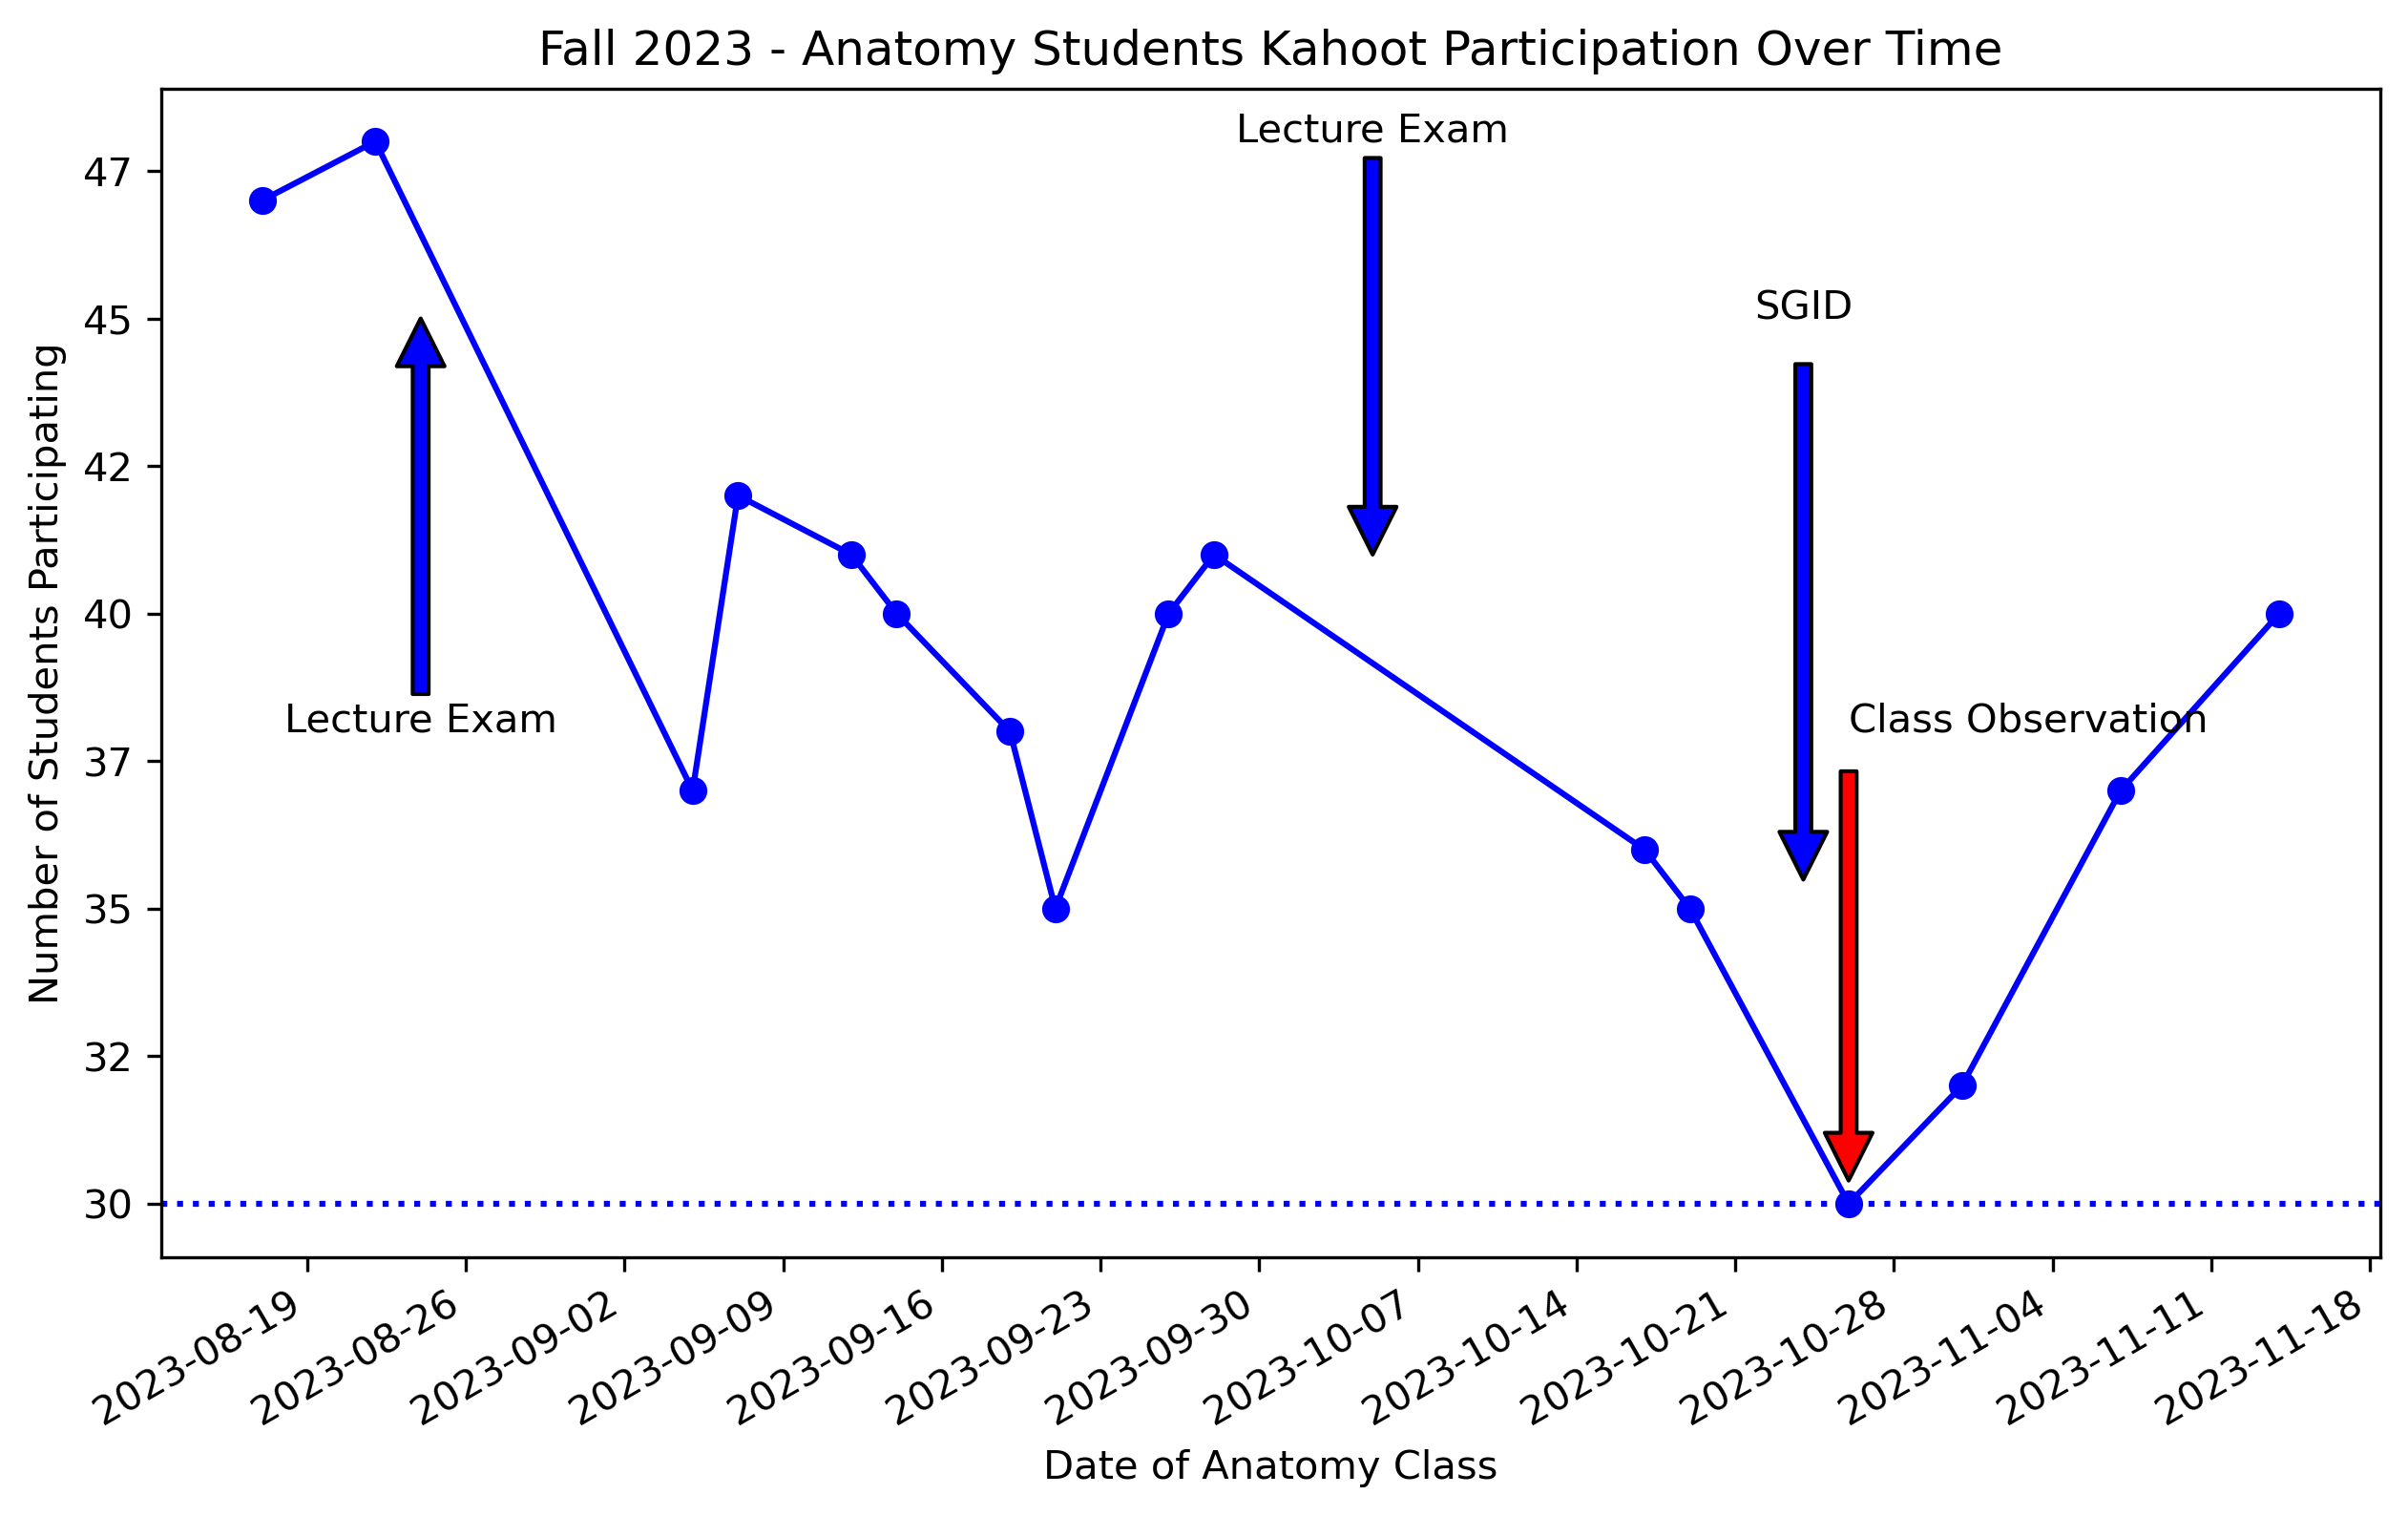

In [32]:
threshold = 30

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Students'], color='b', marker='o')  # Line plot with markers

# Formatting the date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gcf().autofmt_xdate()  # Auto format the date labels for better readability

# Formatting the y-axis to display integers
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.xlabel('Date of Anatomy Class')
plt.ylabel('Number of Students Participating')
plt.title('Fall 2023 - Anatomy Students Kahoot Participation Over Time')
plt.axhline(threshold, color='blue', ls='dotted')

# Annotate SGID
sgid_date = pd.to_datetime('2023-10-24')
# Choose a default y-value for SGID, e.g., average or a specific relevant value
sgid_default_value = 35
plt.annotate('SGID', xy=(sgid_date, sgid_default_value), xytext=(sgid_date, sgid_default_value + 10),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             horizontalalignment='center')

# Annotate Wendy's Observation
wendys_observation_date = pd.to_datetime('2023-10-26')
wendys_observation_value = df.loc[wendys_observation_date, 'Students']
plt.annotate("Class Observation", xy=(wendys_observation_date, wendys_observation_value), xytext=(wendys_observation_date, wendys_observation_value + 8),
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='left')

# Annotate Lecture Exams
lecture_exam1 = pd.to_datetime('2023-8-24')
lecture_exam_value = 45
plt.annotate("Lecture Exam", xy=(lecture_exam1, lecture_exam_value), xytext=(lecture_exam1, lecture_exam_value - 7),
             arrowprops=dict(facecolor='blue', shrink=0.0),
             horizontalalignment='center')

lecture_exam2 = pd.to_datetime('2023-10-5')
lecture_exam2_value = 41
plt.annotate("Lecture Exam", xy=(lecture_exam2, lecture_exam2_value), xytext=(lecture_exam2, lecture_exam2_value + 7),
             arrowprops=dict(facecolor='blue', shrink=0.0),
             horizontalalignment='center')





plt.show()

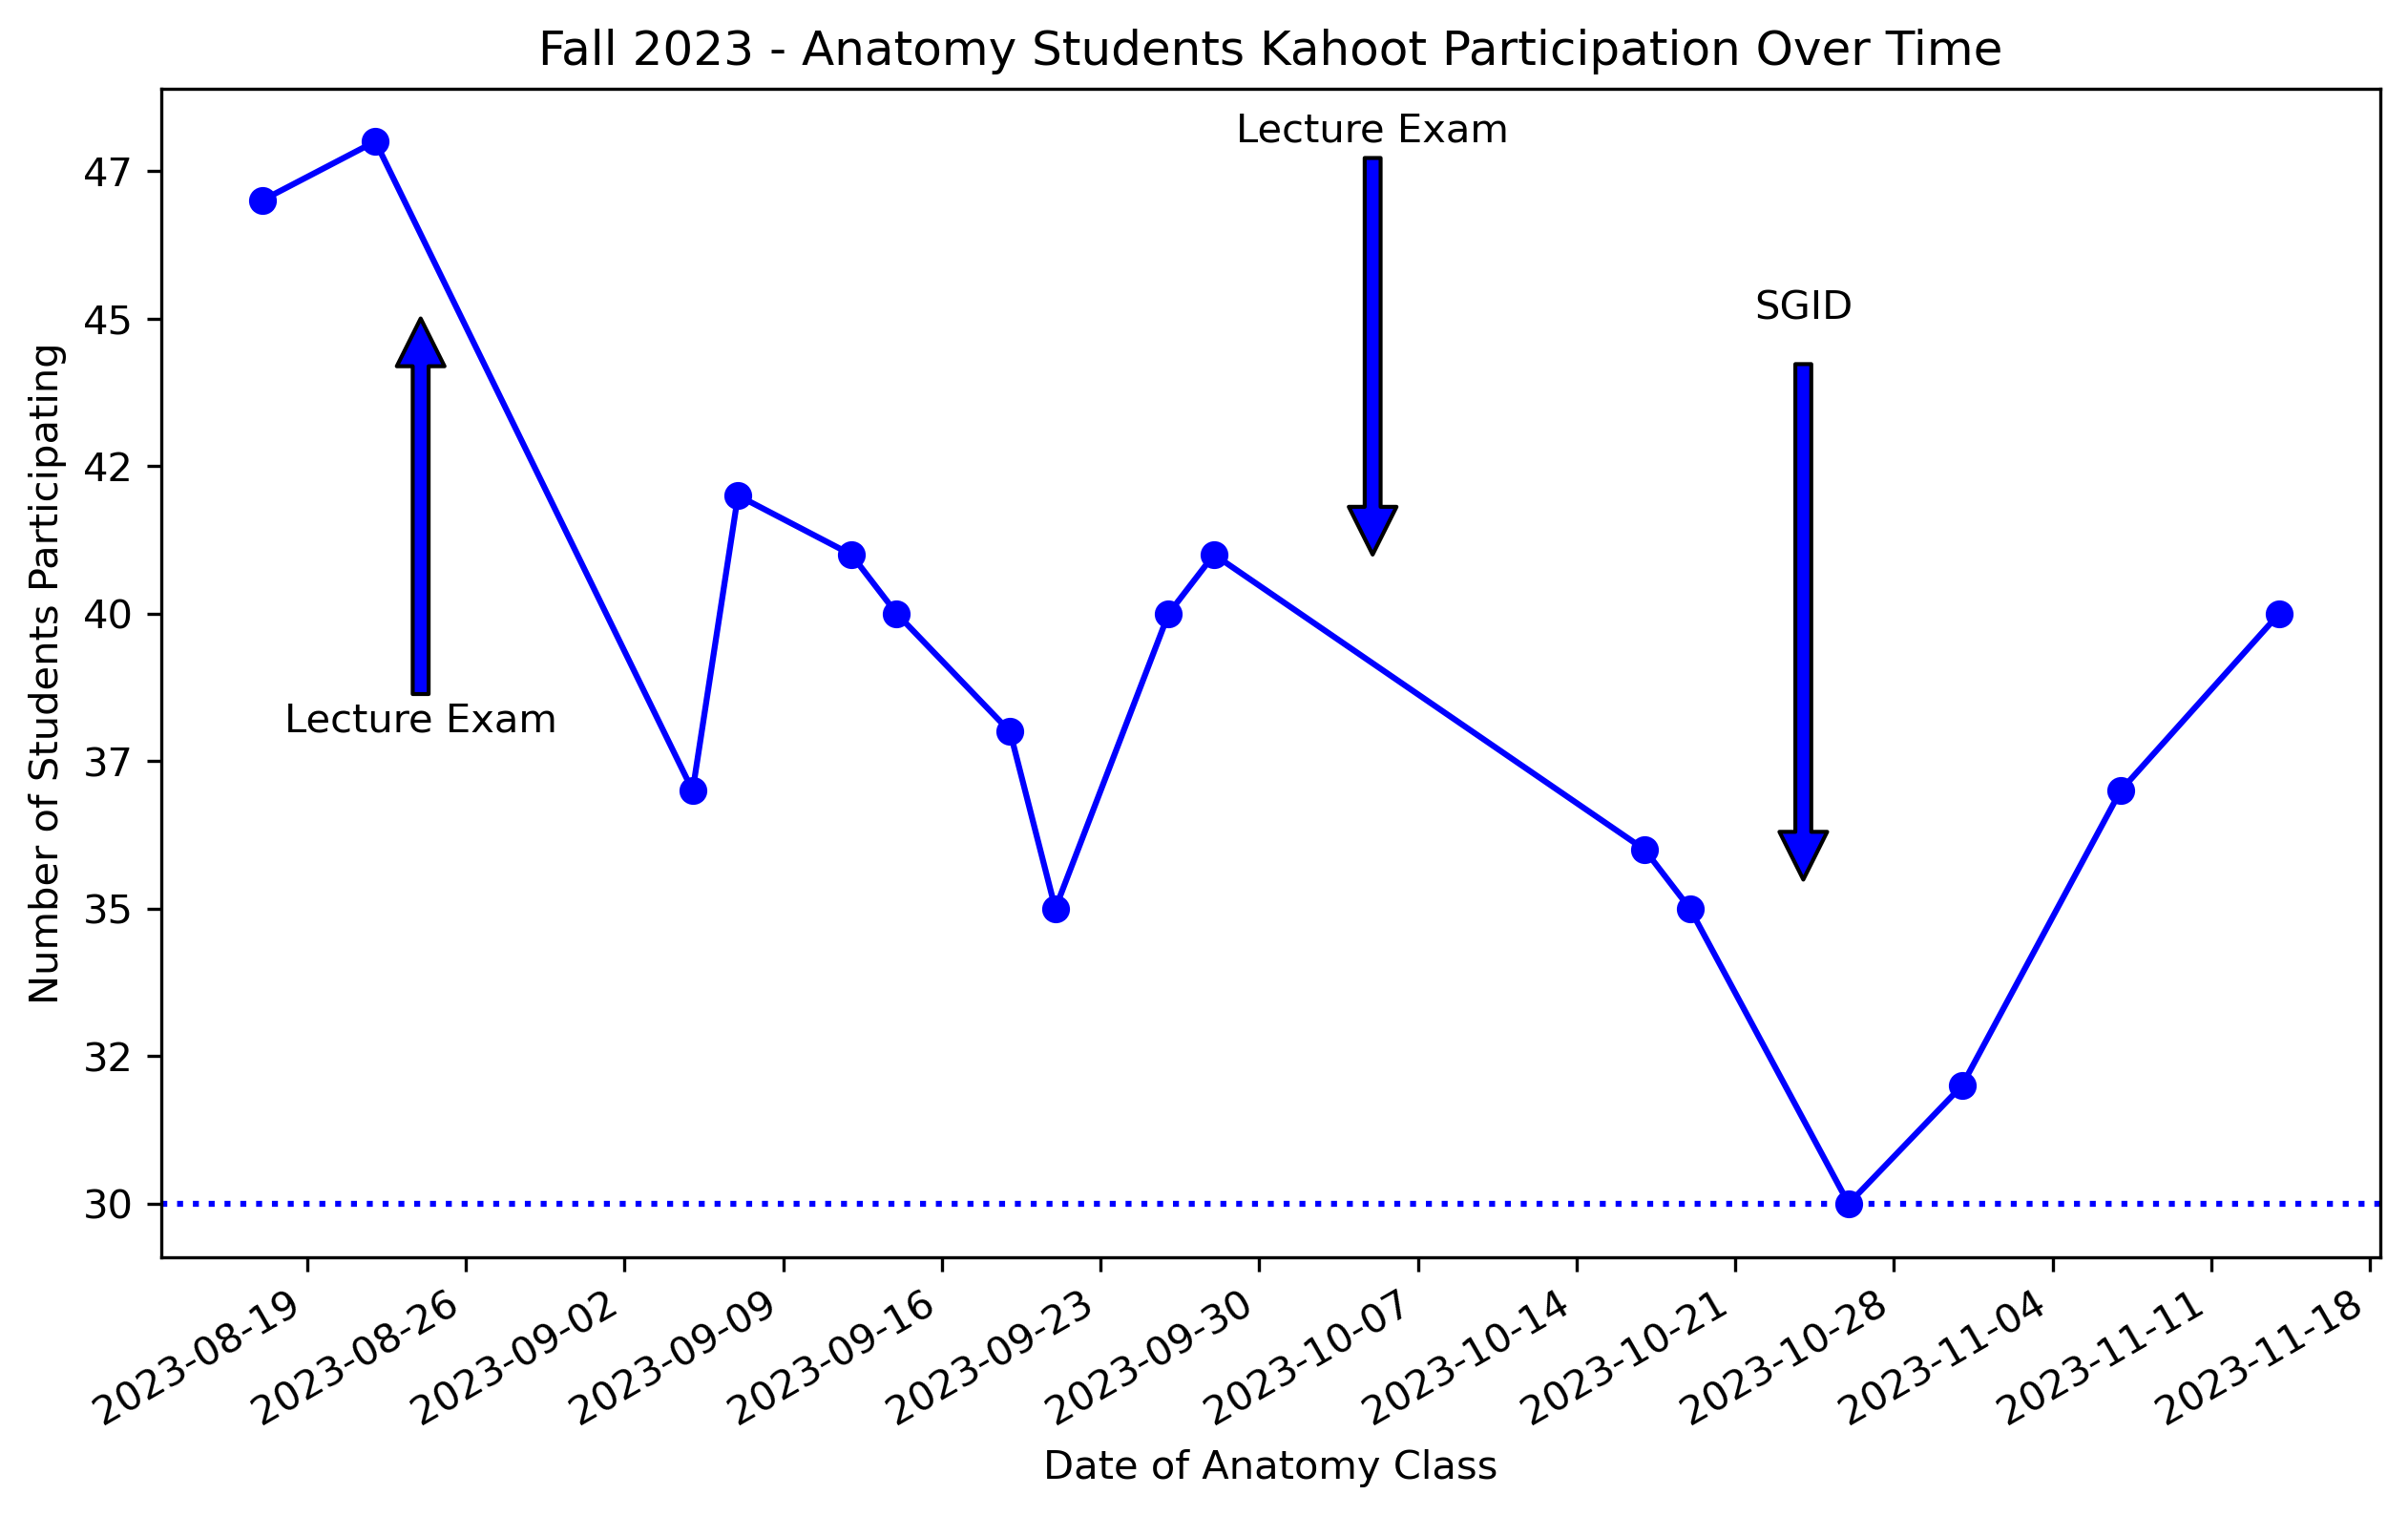

In [34]:
threshold = 30

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Students'], color='b', marker='o')  # Line plot with markers

# Formatting the date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gcf().autofmt_xdate()  # Auto format the date labels for better readability

# Formatting the y-axis to display integers
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.xlabel('Date of Anatomy Class')
plt.ylabel('Number of Students Participating')
plt.title('Fall 2023 - Anatomy Students Kahoot Participation Over Time')
plt.axhline(threshold, color='blue', ls='dotted')

# Annotate SGID
sgid_date = pd.to_datetime('2023-10-24')
# Choose a default y-value for SGID, e.g., average or a specific relevant value
sgid_default_value = 35
plt.annotate('SGID', xy=(sgid_date, sgid_default_value), xytext=(sgid_date, sgid_default_value + 10),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             horizontalalignment='center')

# Annotate Lecture Exams
lecture_exam1 = pd.to_datetime('2023-8-24')
lecture_exam_value = 45
plt.annotate("Lecture Exam", xy=(lecture_exam1, lecture_exam_value), xytext=(lecture_exam1, lecture_exam_value - 7),
             arrowprops=dict(facecolor='blue', shrink=0.0),
             horizontalalignment='center')

lecture_exam2 = pd.to_datetime('2023-10-5')
lecture_exam2_value = 41
plt.annotate("Lecture Exam", xy=(lecture_exam2, lecture_exam2_value), xytext=(lecture_exam2, lecture_exam2_value + 7),
             arrowprops=dict(facecolor='blue', shrink=0.0),
             horizontalalignment='center')





plt.show()

## Discussion

#### Analysis of Current SGID Implementation
Our college's current SGID process, involving small group discussions on positive aspects, areas for improvement, and suggestions for change, aligns with the fundamental structure of SGID. However, something seems to be wrong, because it appears to be correlated with a suppression of student performance and (preliminarily) participation, which is something that I would like to explore further. My research on the matter also suggests that the following components could use some improvement.

#### Encouraging a Range of Perspectives
While each group's contribution to all feedback columns ensures a balanced approach, this structure might inadvertently restrict the depth of genuine insights. Allowing groups to focus more intensely on areas they feel strongly about could elicit more nuanced and honest feedback.

#### Inclusion of Student Reflection
The absence of a student reflection component in our SGID process stands out as a potential area for improvement. Incorporating individual reflections can encourage students to introspect about their role and engagement in the learning process, adhering more closely to SGID's original philosophy of mutual assessment.

#### Voting or Consensus Building
Introducing a mechanism for consensus building or voting could help prioritize feedback. This approach would highlight the most pressing issues as identified by a majority, ensuring the feedback is representative and actionable.

#### The Facilitator's Role
The facilitator's neutrality and effectiveness in managing the discussion are vital. They should ensure equitable participation and maintain the focus on constructive feedback, which necessitates specialized training and skills. For this reason, it would be particularly useful if the facilitator was not in the same department as the instructor.

#### Follow-up 
Implementing a follow-up SGID poll to determine the effects of the process on student motivation is something that could help us to understand what I am observing.

## Conclusion

The initial data suggests a negative impact of SGID on both student performance and participation immediately after its conduction. 

Further examination is required to determine what the potential negative effects of this process are, which could be achieved through post-SGID student polling.

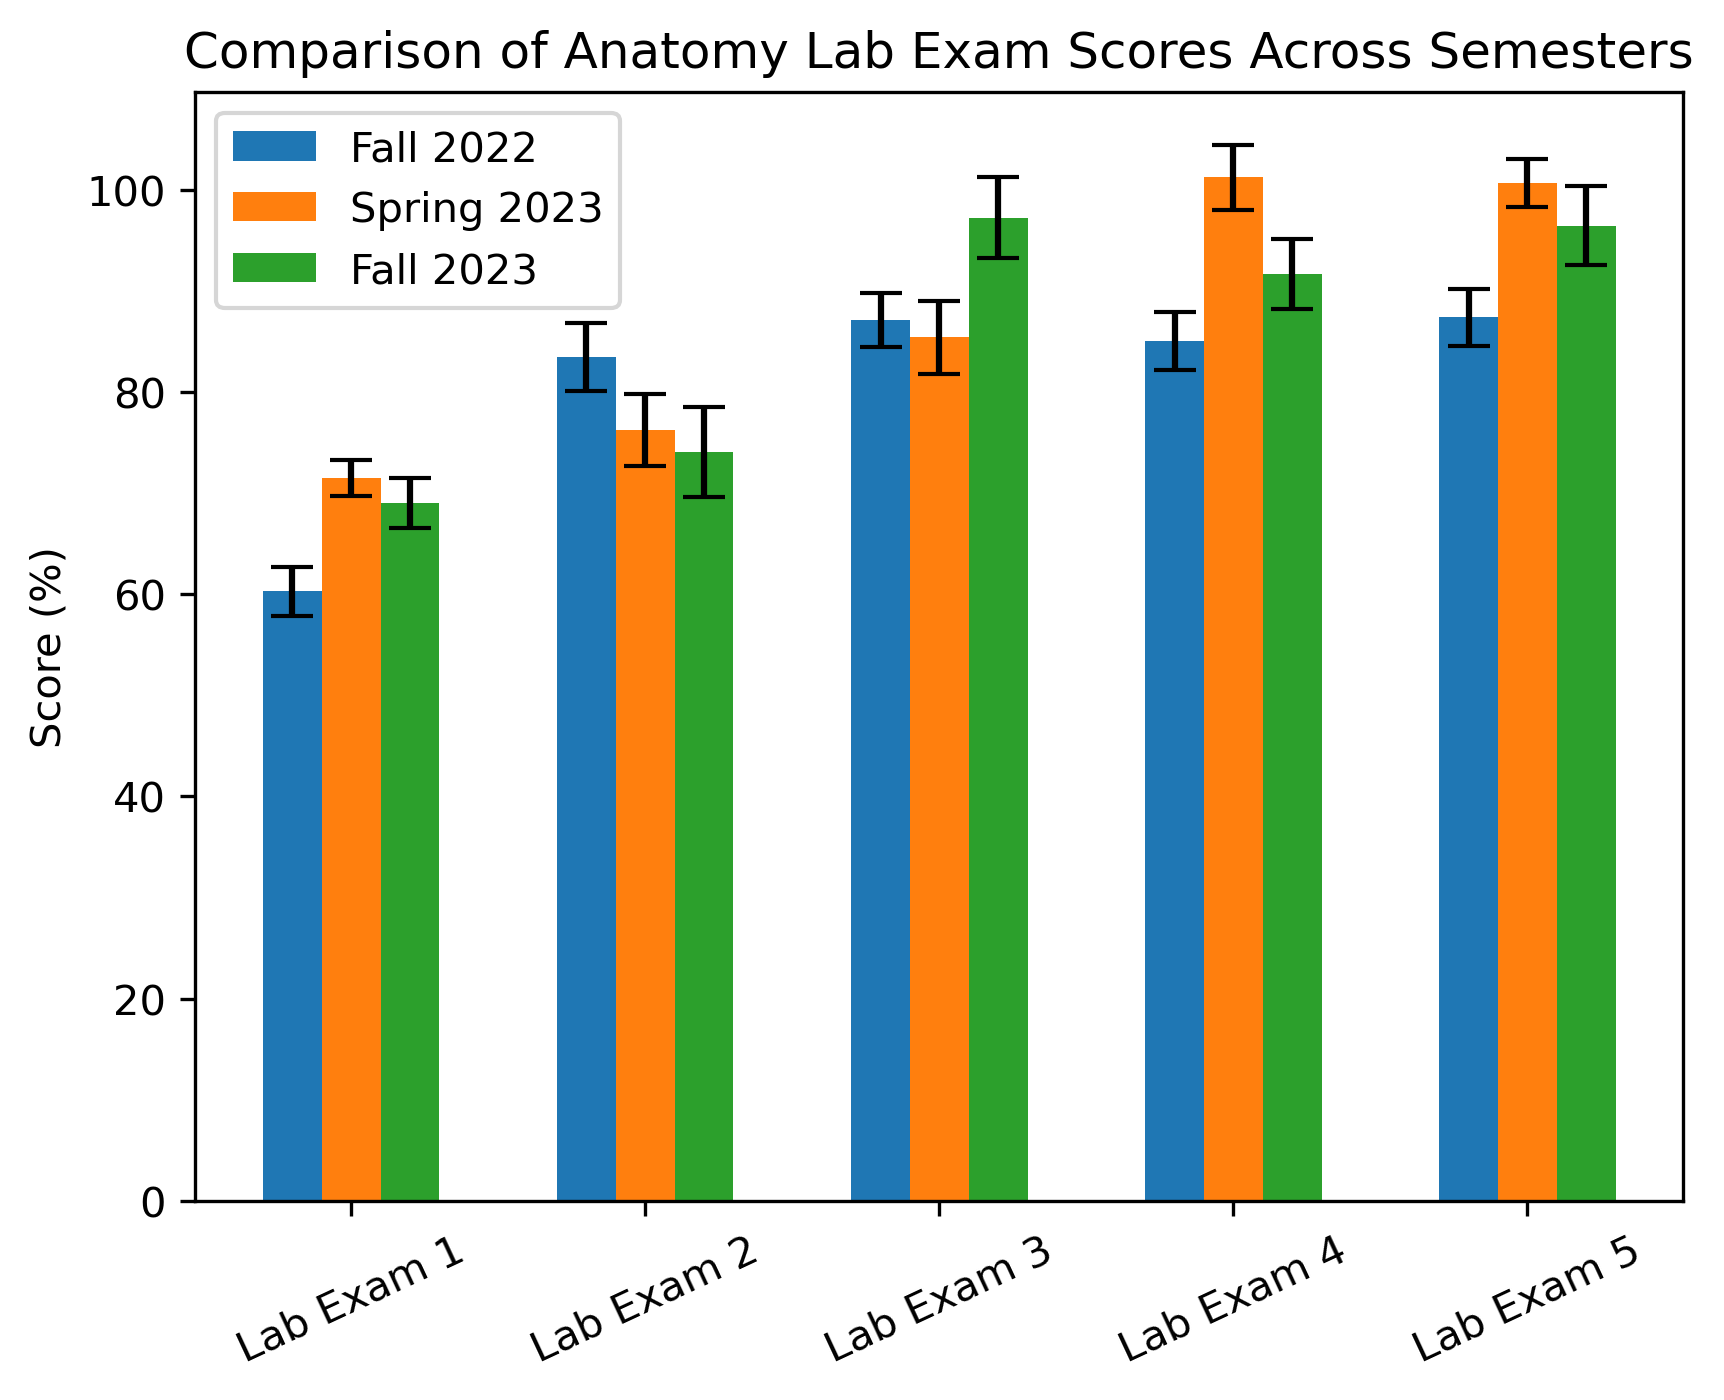

In [38]:
# Assuming 'means', 'sems', 'means2', 'sems2', 'means3', and 'sems3' are your dictionaries
exam_labels = ['Lab Exam 1', 'Lab Exam 2', 'Lab Exam 3', 'Lab Exam 4', 'Lab Exam 5']
exam_labels3 = ['Lab Exam 1', 'Lab Exam 2', 'Lab Exam 3', 'Lab Exam 4', 'Lab Exam 5']

mean_values = [means['Labexam1mean'], means['labexam2mean'], means['labexam3mean'], means['labexam4mean'], means['labexam5mean']]
sem_values = [sems['Labexam1sem'], sems['labexam2sem'], sems['labexam3sem'], sems['labexam4sem'], sems['labexam5sem']]

mean_values2 = [means2['Labexam1mean'], means2['labexam2mean'], means2['labexam3mean'], means2['labexam4mean'], means2['labexam5mean']]
sem_values2 = [sems2['Labexam1sem'], sems2['labexam2sem'], sems2['labexam3sem'], sems2['labexam4sem'], sems2['labexam5sem']]

mean_values3 = [means3['Labexam1mean'], means3['labexam2mean'], means3['labexam3mean'], means3['labexam4mean'], means3['labexam5mean']]
sem_values3 = [sems3['Labexam1sem'], sems3['labexam2sem'], sems3['labexam3sem'], sems3['labexam4sem'], sems3['labexam5sem']]

# Set the width of the bars
bar_width = 0.2  # Adjusted for three datasets

# Set the positions of the bars on the x-axis
r1 = np.arange(len(mean_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1][:len(mean_values3)]  # Adjust for df3's length

# Build the bar plots
plt.bar(r1, mean_values, width=bar_width, yerr=sem_values, capsize=5, label='Fall 2022')
plt.bar(r2, mean_values2, width=bar_width, yerr=sem_values2, capsize=5, label='Spring 2023')
plt.bar(r3, mean_values3, width=bar_width, yerr=sem_values3, capsize=5, label='Fall 2023')

# Add labels, title, and custom x-axis tick labels
plt.ylabel('Score (%)')
plt.xticks([r + bar_width for r in range(len(mean_values))], exam_labels, rotation=25)
plt.title('Comparison of Anatomy Lab Exam Scores Across Semesters')

# Calculate the mid-point between labexam3 and labexam4 for annotation
x_position_labexam3 = r1[2] + bar_width / 2  # Adjust index if needed
x_position_labexam4 = r1[3] - bar_width / 2  # Adjust index if needed
mid_point_x = (x_position_labexam3 + x_position_labexam4) / 2 - .65

# Set y position for annotation (choose a value that suits your plot)
y_position = max(max(mean_values), max(mean_values2), max(mean_values3)) - 6 # Adjust as needed

# Create a legend
plt.legend()

# Show or save the plot
plt.show()